In [1]:
import cv2
import time
import sheet01
import numpy as np
from matplotlib import pyplot

In [2]:
img_pth = './bonn.png'
image = cv2.imread(img_pth, cv2.IMREAD_GRAYSCALE)
height, width = image.shape

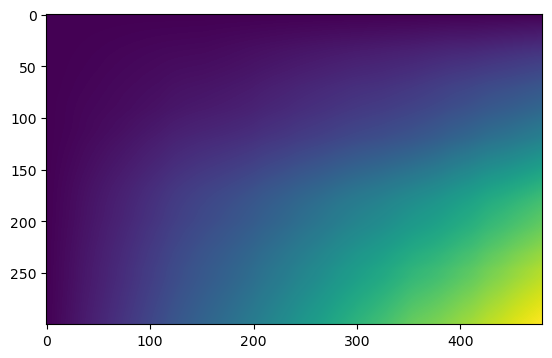

In [3]:
int_image = sheet01.integral_image(image)
pyplot.imshow(int_image.astype(np.float32) / int_image[-1, -1])

In [4]:
start = time.time()
sheet01.sum_image(image) / np.prod(image.shape)
print('Time taken by sum: {0}'.format(time.time() - start))

start = time.time()
sheet01.integral_image(image)[-1, -1] / np.prod(image.shape)
print('Time taken by integral: {0}'.format(time.time() - start))

start = time.time()
cv2.integral(image)[-1, -1] / np.prod(image.shape)
print('Time taken by cv.integral: {0}'.format(time.time() - start))

Time taken by sum: 0.03762245178222656
Time taken by integral: 0.0852205753326416
Time taken by cv.integral: 0.0001728534698486328


In [5]:
time_sum, time_int = 0, 0
for i in range(10):
    top_left_y, top_left_x = np.random.randint(0, height - 100), np.random.randint(0, width - 100)
    
    start = time.time()
    mean_sum_i = sheet01.sum_image(image[top_left_y: (top_left_y + 100), top_left_x: (top_left_x + 100)]) / (100 * 100)
    time_sum += (time.time() - start)

    start = time.time()
    mean_int_i = (int_image[top_left_y + 100, top_left_x + 100] +\
                  int_image[top_left_y, top_left_x] -\
                  int_image[top_left_y, top_left_x + 100] -\
                  int_image[top_left_y + 100, top_left_x]) / (100 * 100)
    time_int += (time.time() - start)
    
print('Time taken by sum:{0}'.format(time_sum / 10))
print('Time taken by integral:{0}'.format(time_int / 10))

Time taken by sum:0.002383780479431152
Time taken by integral:1.850128173828125e-05


In [6]:
image_equ = cv2.equalizeHist(image)
test1 = (image.flatten()).astype(float)
test2 = (image_equ.flatten()).astype(float)
mean_dist = np.sum(np.abs(np.subtract(test1,test2))) / (width*height)
max_dist = np.max(np.abs(np.subtract(test1,test2)))
print('Maximum Distance org-2a:{0}'.format(max_dist))

image_equ2 = sheet01.equalize_hist_image(image)
test3 = (image_equ2.flatten()).astype(float)
mean_dist = np.sum(np.abs(np.subtract(test1,test3))) / (width*height)
max_dist = np.max(np.abs(np.subtract(test1,test3))) 
print('Maximum Distance org-2b:{0}'.format(max_dist))

max_dist = np.max(np.abs(np.subtract(test2,test3))) 
print('Maximum Distance 2a-2b:{0}'.format(max_dist))

Maximum Distance org-2a:21.0
Maximum Distance org-2b:20.0
Maximum Distance 2a-2b:20.0


--- 0.002730131149291992s seconds (GaussianBlur)---


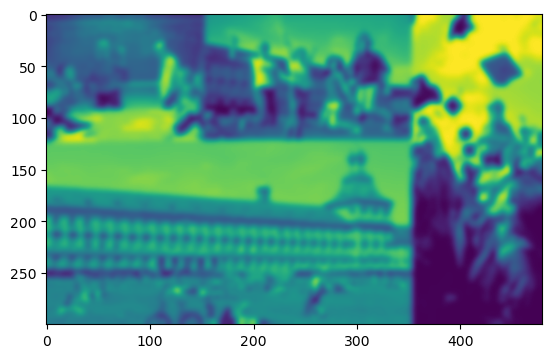

In [7]:
sigma = 2. * np.sqrt(2.);

start_time = time.time()
image_blur1 = cv2.GaussianBlur(image, (0,0), sigma)
print('--- {0}s seconds (GaussianBlur)---'.format((time.time() - start_time)))
pyplot.imshow(image_blur1)

--- 0.00496673583984375s seconds (Filter2D)---


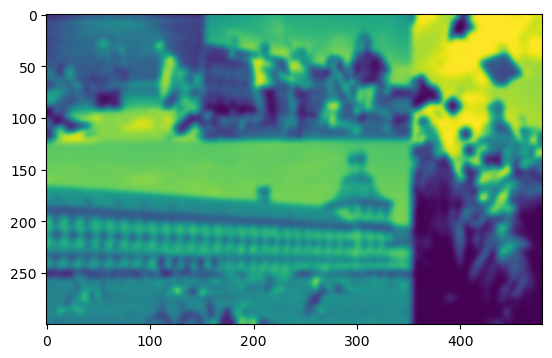

In [8]:
start_time = time.time()
image_blur2 = cv2.filter2D(image, -1, sheet01.get_kernel(sigma))
print('--- {0}s seconds (Filter2D)---'.format((time.time() - start_time)))
pyplot.imshow(image_blur2)

--- 0.0024514198303222656s seconds (SepFilter2D)---


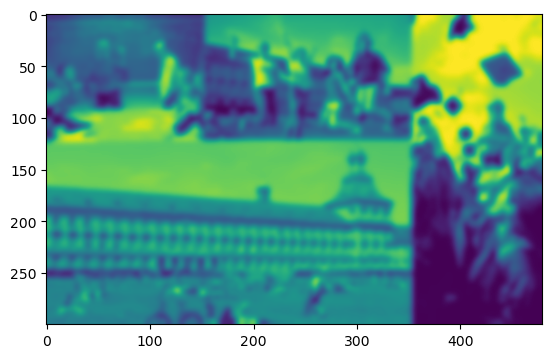

In [9]:
start_time = time.time()
kernel1D = sheet01.get_kernel_1D(sigma)
image_blur3 = cv2.sepFilter2D(image, -1, kernel1D, kernel1D)
print('--- {0}s seconds (SepFilter2D)---'.format((time.time() - start_time)))
pyplot.imshow(image_blur3)

In [10]:
print('4) Distance max 1-2:{0}'.format(np.max(np.abs( image_blur1 - image_blur2 ))))
print('4) Distance max 1-3:{0}'.format(np.max(np.abs( image_blur1 - image_blur3 ))))
print('4) Distance max 2-3:{0}'.format(np.max(np.abs( image_blur2 - image_blur3 ))))

4) Distance max 1-2:255
4) Distance max 1-3:255
4) Distance max 2-3:255


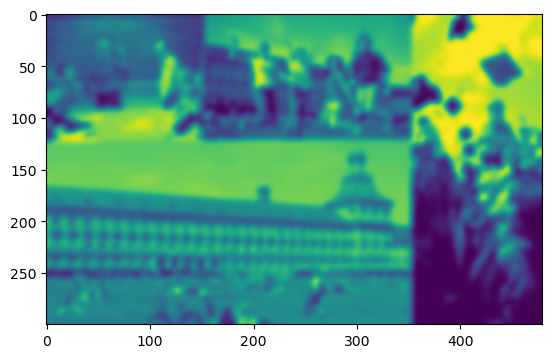

In [11]:
sigma = 2
kernel_2d = sheet01.get_kernel(sigma)
    
image_blur1 = cv2.filter2D(image, -1, kernel_2d)
image_blur1 = cv2.filter2D(image_blur1, -1, kernel_2d)
pyplot.imshow(image_blur1)

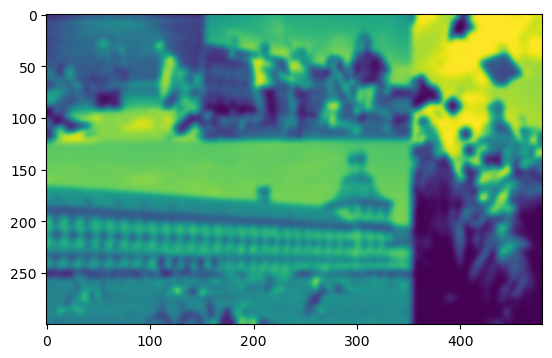

In [12]:
kernel_2d = sheet01.get_kernel(2 * np.sqrt(2))
image_blur2 = cv2.filter2D(image, -1, kernel_2d)
pyplot.imshow(image_blur2)

In [13]:
print('5) Distance max:{0}'.format(np.max(np.abs(np.subtract(image_blur1,image_blur2)))))

5) Distance max:255


In [14]:
filter_size = [1, 3, 5, 7, 9]

salt_pepper = sheet01.add_salt_n_pepper_noise(image.copy())

best_gaussian = None
best_median = None
best_bilateral = None

best_dist = [np.inf, np.inf, np.inf]

for sigma in filter_size:
    gaussian_blur = cv2.GaussianBlur(salt_pepper, (0, 0), sigma)
    median_blur = cv2.medianBlur(salt_pepper, sigma)
    bilateral_blur = cv2.bilateralFilter(salt_pepper, -1, 1000.0, sigma)
    dist = [np.mean(np.abs(gaussian_blur - image)), np.mean(np.abs(median_blur - image)), np.mean(np.abs(bilateral_blur - image))]
    
    if best_dist[0] > dist[0]:
        best_dist[0] = dist[0]
        best_gaussian = gaussian_blur
    if best_dist[1] > dist[1]:
        best_dist[1] = dist[1]
        best_median = median_blur
    if best_dist[2] > dist[2]:
        best_dist[2] = dist[2]
        best_bilateral = bilateral_blur

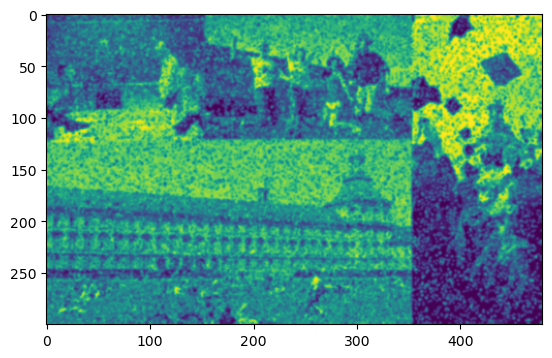

In [15]:
pyplot.imshow(best_gaussian)

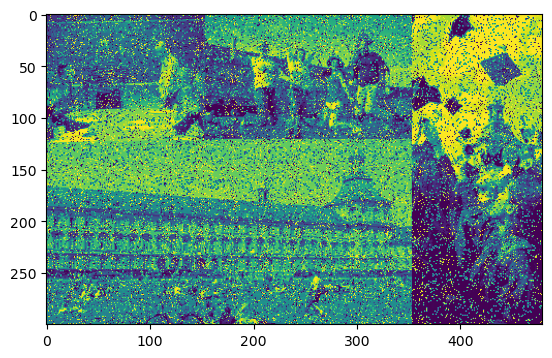

In [16]:
pyplot.imshow(best_median)

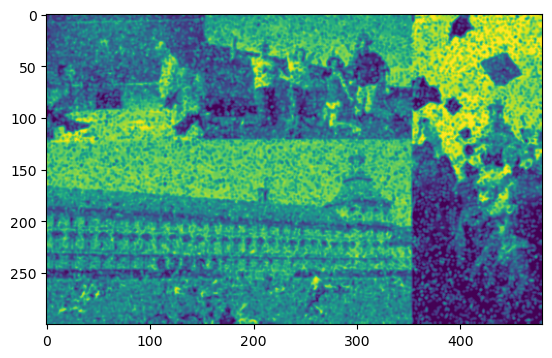

In [17]:
pyplot.imshow(best_bilateral)

In [18]:
kernel1 = np.array([[0.0113, 0.0838, 0.0113], [0.0838, 0.6193, 0.0838], [0.0113, 0.0838, 0.0113]])    
kernel2 = np.array([[-0.8984, 0.1472, 1.1410], [-1.9075, 0.1566, 2.1359], [-0.8659, 0.0573, 1.0337]])
    
image_k1 = cv2.filter2D(image,-1,kernel1)
image_k2 = cv2.filter2D(image,-1,kernel2)

[w1, u1, vt1] = cv2.SVDecomp(kernel1)
print(w1)
print(u1)
print(vt1)
    
[w2, u2, vt2] = cv2.SVDecomp(kernel2)
print(w2)
print(u2)
print(vt2)

new_sigma1 = np.sqrt(w1[0])
new_sigma2 = np.sqrt(w2[0])

filterV1 = u1[:, 0:1] * new_sigma1
filterH1 = vt1[0:1, :] * new_sigma1
    
filterV2 = u2[:, 0:1] * new_sigma2
filterH2 = vt2[0:1, :] * new_sigma2
 
image_k12 =  cv2.sepFilter2D(image, -1, filterH1, filterV1)
image_k22 =  cv2.sepFilter2D(image, -1, filterH2, filterV2)

[[6.41975860e-01]
 [7.58595503e-05]
 [0.00000000e+00]]
[[ 1.32886810e-01  6.94507808e-01 -7.07106781e-01]
 [ 9.82182362e-01 -1.87930328e-01 -6.38571933e-18]
 [ 1.32886810e-01  6.94507808e-01  7.07106781e-01]]
[[ 1.32886810e-01  9.82182362e-01  1.32886810e-01]
 [-6.94507808e-01  1.87930328e-01 -6.94507808e-01]
 [-7.07106781e-01 -7.40128842e-15  7.07106781e-01]]
[[3.48798585]
 [0.1004873 ]
 [0.03576043]]
[[ 0.41770436 -0.88591472 -0.20168833]
 [ 0.82212205  0.46303488 -0.33123111]
 [ 0.38683124 -0.02745575  0.9217417 ]]
[[-0.65321956  0.06089355  0.75471596]
 [-0.63251094 -0.59180216 -0.49970002]
 [ 0.41621403 -0.80377993  0.42509258]]


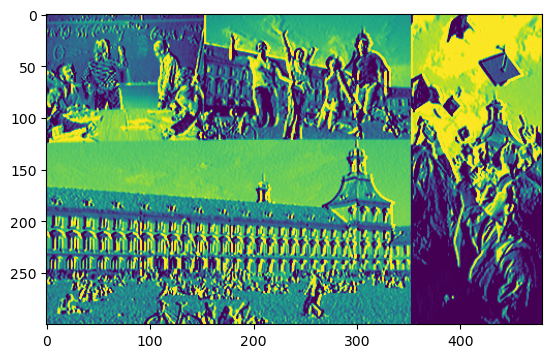

In [19]:
pyplot.imshow(image_k2)

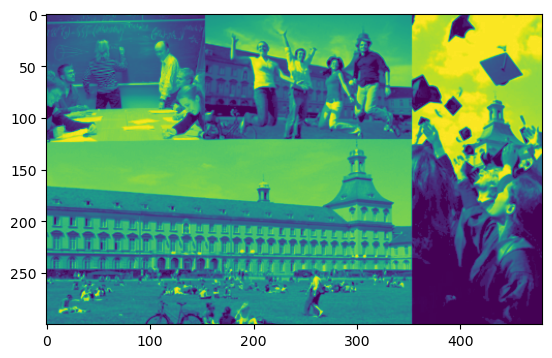

In [20]:
pyplot.imshow(image_k1)

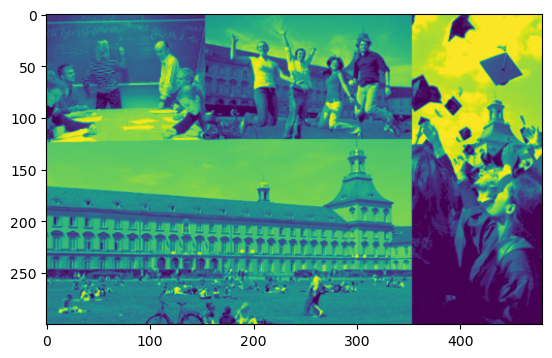

In [21]:
pyplot.imshow(image_k12)

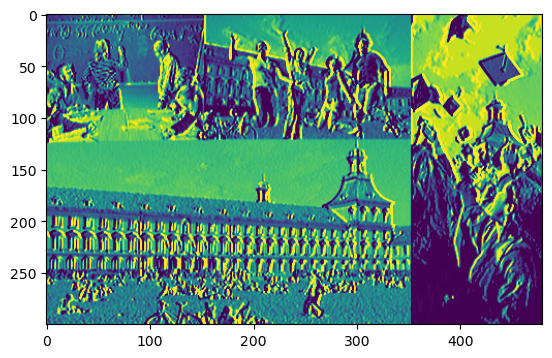

In [22]:
pyplot.imshow(image_k22)